In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
advection = 10
alpha = 1/advection

xL = 0
xR = 1
yL = 0
yR = 1

scaling_alpha = 1/(xR-xL)
scaling_beta = (-xL)/(xR - xL)

In [3]:
i = 100 # number of colocation points
xi = np.linspace(xL, xR, i+2)

x = np.linspace(xL,xR,i)

xi = xi[1:-1]

xi = scaling_alpha*xi + scaling_beta



In [4]:

n_sin = 101
#This is the number of sin functions we want in our system, the total size of the matrix will be this plus 1

A = np.zeros((i+2, n_sin+1)) 

R_1_i = np.zeros(n_sin)
R_2_i = np.zeros(n_sin)
#These are matrices that store the random coefficients R_i that are put into the sine function
#They have the same size as n_sine because the random variable set for each column is the same

for j in range (n_sin):
    #initialize random variable values
    R_1_i[j] = np.random.default_rng().uniform(-1,1)
    R_2_i[j] = np.random.default_rng().uniform(-1,1)

A[0, n_sin] = 1
A[i+1, n_sin] = 1


#Change the value for the boundary points to equal 1 because of the bias

#creates the first two rows through iteration
for j in range (i+2):
    for k in range(n_sin):
        if(j == 0):
            A[j][k] = np.sin(R_1_i[k]*(xL*scaling_alpha + scaling_beta) + R_2_i[k])
            
        elif(j == 1):
            A[j][k] = np.sin(R_1_i[k]*(xR*scaling_alpha + scaling_beta) + R_2_i[k])
            
        else:
            A[j][k] = ((xR-xL)*alpha*scaling_alpha*(R_1_i[k]**2)*-np.sin(R_1_i[k]*xi[j-2] + R_2_i[k])) - R_1_i[k]*np.cos(R_1_i[k]*xi[j-2] + R_2_i[k])

print(np.linalg.cond(A))

b_vector = np.zeros(i+2)

b_vector[0] = yL

b_vector[1] = yR


2.5220684199873393e+19


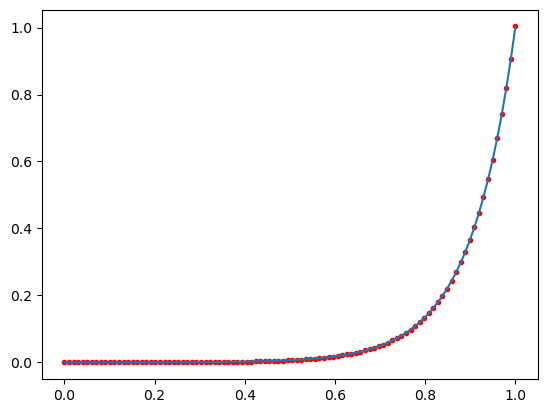

In [5]:
coeff = np.matmul(np.linalg.pinv(A), b_vector)

N = 100 # No of predictions

y_sin = np.zeros(N)

x = np.linspace(xL, xR, N)

y_exact = yL + (yR-yL)*(np.exp((x-xL)/(alpha*(xR-xL))) - 1)/(np.exp(1/alpha) - 1 )

x_scaled = scaling_alpha*x + scaling_beta

for ith in range(N):

    for j in range(n_sin):
        y_sin[ith] = y_sin[ith] + coeff[j] * np.sin(R_1_i[j]*x_scaled[ith]+R_2_i[j])
    y_sin[ith] = y_sin[ith] + coeff[n_sin]


plt.plot(x,y_sin, 'r.')

plt.plot(x, y_exact)

In [6]:
error = np.sqrt((np.sum(y_exact - y_sin)**2)/N)
print(error)

0.0035613318813820295
